In [1]:
from psyclone.parse.algorithm import parse
_, inv_info = parse("shallow_alg.f90", api="gocean1.0")

In [2]:
from psyclone.psyGen import PSyFactory, TransInfo
psy = PSyFactory("gocean1.0", distributed_memory=False).create(inv_info)

In [3]:
print(psy.invokes.names)
sched = psy.invokes.get('invoke_0').schedule
print(sched.view())


dict_keys(['invoke_0', 'invoke_1', 'invoke_2', 'invoke_3'])
GOInvokeSchedule[invoke='invoke_0']
    0: Loop[type='outer', field_space='go_cu', it_space='go_internal_pts']
        Literal[value:'2']
        Literal[value:'jstop']
        Literal[value:'1']
        Schedule[]
            0: Loop[type='inner', field_space='go_cu', it_space='go_internal_pts']
                Literal[value:'2']
                Literal[value:'istop+1']
                Literal[value:'1']
                Schedule[]
                    0: CodedKern compute_cu_code(cu_fld,p_fld,u_fld) [module_inline=False]
    1: Loop[type='outer', field_space='go_cv', it_space='go_internal_pts']
        Literal[value:'2']
        Literal[value:'jstop+1']
        Literal[value:'1']
        Schedule[]
            0: Loop[type='inner', field_space='go_cv', it_space='go_internal_pts']
                Literal[value:'2']
                Literal[value:'istop']
                Literal[value:'1']
                Schedule[]
             

In [4]:
graph = sched.dag()

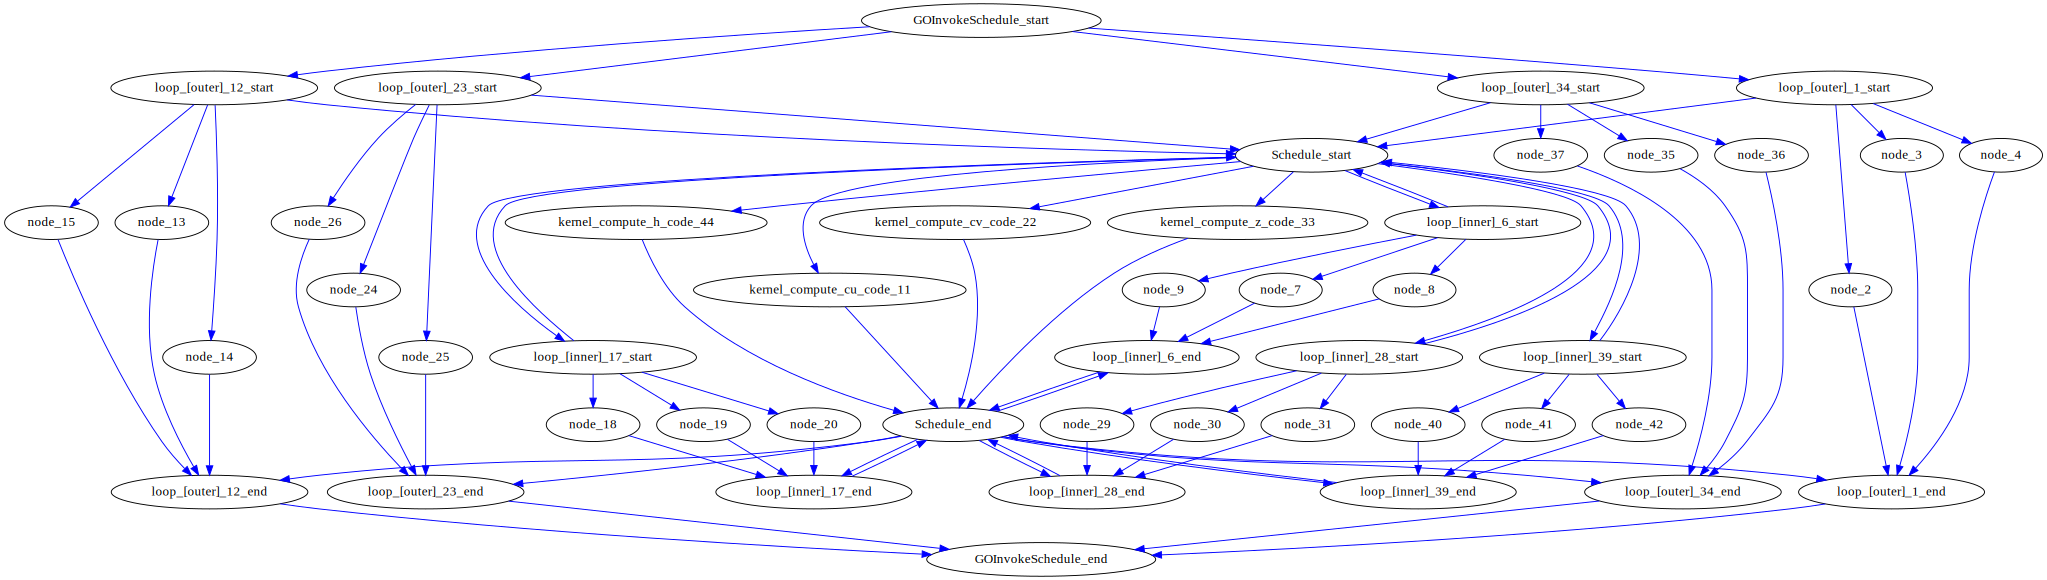

In [6]:
graph